# Librairies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings; 
warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
def intToDateTime(o):
    i = str(o)
    return i[0:4]+'-'+i[4:6]+'-'+i[-2:]+' 0:0:0'

# Lecture et préparation des données
## Lire les données

In [3]:
df = pd.read_csv("./data/train.csv")
print("Dimension des données (nombre d'échantillons, nombre de variables)")
print(df.shape)
print("Un subset du tableau :")
df.head()

Dimension des données (nombre d'échantillons, nombre de variables)
(494849, 16)
Un subset du tableau :


,visitor_id,visit_id,visit_day,device_category,operating_system,geo_country,total_visits,total_hits,url_de_provenance,total_page_view,total_time_on_site,time_on_screen,total_bounces,total_transactions,transaction_day,label
0,2956552361585281319,1486205902,20170204,desktop,Macintosh,United States,28,784,https://www.google.com/,28.0,27020.0,NaN,NaN,NaN,NaN,0
1,8505108373105734622,1473273653,20160907,desktop,Windows,United States,34,1156,NaN,28.0,119612.0,NaN,NaN,NaN,NaN,0
2,4053455542325366513,1479951049,20161123,desktop,Windows,Mexico,23,529,https://www.google.com.mx/,16.0,10856.0,NaN,NaN,NaN,NaN,0
3,77898258192508950,1487715789,20170221,desktop,Windows,Puerto Rico,40,1600,https://www.google.com.pr/,31.0,50400.0,NaN,NaN,NaN,NaN,0
4,2673551203292988105,1480157570,20161126,desktop,Windows,Israel,22,484,NaN,15.0,9504.0,NaN,NaN,NaN,NaN,0


## Préparation des données

Sur le site de google où on a récupéré les données : https://support.google.com/analytics/answer/3437719?hl=fr On peut avoir un "dictionnaire" des variables :

* visitor_id - ID de visiteur unique (également appelé ID client).
* visit_id - Identifiant défini pour cette session
* visit_day - Date de la session au format AAAAMMJJ
* device_category - Type d'appareil (ordinateur de bureau, tablette ou appareil mobile).
* total_visits - Nombre de sessions (pour information). Cette valeur correspond à 1 pour les sessions comprenant des événements d'interaction. Elle est nulle en l'absence d'interactions. 
* total_hits - Nombre total d'appels durant la session
* total_page_view - Nombre total de pages vues au cours de la session.
* total_time_on_site - Durée totale de la session (en secondes).
* time_on_screen - Durée totale à l'écran (en secondes).	
* total_bounces - Nombre total de rebonds (pour information). Pour une session avec rebond, la valeur est de 1. Sinon, elle est nulle.	
* total_transactions - Nombre total de transactions de commerce électronique au cours de la session.	
* transaction_day - Date(au format AAAAMMJJ) à laquelle la session a converti 	
* label - Renseigner si l’utilisateur a converti ou pas. Valeurs possibles du label : 1 ou 0

On remarque que l'on peut supprimer visitor_id et visit_id qui n'auront évidemment pas d'impact sur la conversion des visiteurs.

In [4]:
#df = df.drop(["visitor_id","visit_id"], axis=1)
#df.head()

In [5]:
df.describe()

,visit_id,visit_day,total_visits,total_hits,total_page_view,total_time_on_site,time_on_screen,total_bounces,total_transactions,transaction_day,label
count,4.948490e+05,4.948490e+05,494849.000000,494849.000000,494837.000000,2.354050e+05,0.0,259272.000000,0.0,2.627000e+03,494849.000000
mean,1.480050e+09,2.016380e+07,3.809873,72.001706,3.247593,3.535080e+03,NaN,1.009349,NaN,2.016378e+07,0.005309
std,5.713121e+06,4.221903e+03,7.594956,1058.984939,5.486915,2.284286e+04,NaN,0.096279,NaN,4.217383e+03,0.072667
min,1.470035e+09,2.016080e+07,1.000000,1.000000,1.000000,2.000000e+00,NaN,1.000000,NaN,2.016080e+07,0.000000
25%,1.475719e+09,2.016100e+07,1.000000,1.000000,1.000000,8.700000e+01,NaN,1.000000,NaN,2.016093e+07,0.000000
50%,1.479445e+09,2.016112e+07,1.000000,1.000000,1.000000,2.670000e+02,NaN,1.000000,NaN,2.016113e+07,0.000000
75%,1.484772e+09,2.017012e+07,3.000000,9.000000,3.000000,1.392000e+03,NaN,1.000000,NaN,2.017012e+07,0.000000
max,1.491030e+09,2.017033e+07,500.000000,250000.000000,341.000000,4.413654e+06,NaN,3.000000,NaN,2.017043e+07,1.000000


Les informations concernant les variables `visit_id` et `visit_day` ne sont pas à prendre en compte. Ces colones ne sont conservées qu'à titre idicatif, elles ne seront pas prises en compte dans laconstruction du modèle.

Nous pouvons regarder si il y a des variables catégorielles (=qualitatives), c'est à dire des variables qui sont des niveaux et non pas des variables continues.

Pour cela nous pouvons par exemple :

* regarder le dictionnaire des données,
* regarder si la variables n'est pas un nombre.

Néanmoins,les variables catégorielles sont souvent encodées par des valeurs numériques (beaucoup plus facile pour les mettre dans des matrices après).

Nous pouvons donc aussi regarder combien de valeurs uniques nous avons pour chacune des variables afin de se donner une idée desquelles pourraient être catégorielles.

Attention, cela n'empêche pas le bon sens, ou la réflexion côté métier afin de correctement comprendre les données.

In [6]:
for colname, serie in df.iteritems():
    print(colname + " has " + str(serie.drop_duplicates().shape[0]) + " unique values.")

visitor_id has 494493 unique values.
visit_id has 487285 unique values.
visit_day has 243 unique values.
device_category has 3 unique values.
operating_system has 20 unique values.
geo_country has 216 unique values.
total_visits has 204 unique values.
total_hits has 347 unique values.
url_de_provenance has 16132 unique values.
total_page_view has 155 unique values.
total_time_on_site has 16972 unique values.
time_on_screen has 1 unique values.
total_bounces has 4 unique values.
total_transactions has 1 unique values.
transaction_day has 263 unique values.
label has 2 unique values.


Il semblerait que **label** soit catégorielle. C'est logique, il s'agit de notre variable cible et nous cherchons à déterminer si un client a convertit ou non. **device_category** est elle aussi une variable catégrorielle: il s'agit du type d'appareil (ordinateur de bureau, tablette ou appareil mobile). Idem pour **geo_country,url_de_provenance**.
La variable **time_on_screen** a une seule modalité, nous pouvons la supprimer. 

In [7]:
df = df.drop(["time_on_screen"], axis=1)
df.head()

,visitor_id,visit_id,visit_day,device_category,operating_system,geo_country,total_visits,total_hits,url_de_provenance,total_page_view,total_time_on_site,total_bounces,total_transactions,transaction_day,label
0,2956552361585281319,1486205902,20170204,desktop,Macintosh,United States,28,784,https://www.google.com/,28.0,27020.0,NaN,NaN,NaN,0
1,8505108373105734622,1473273653,20160907,desktop,Windows,United States,34,1156,NaN,28.0,119612.0,NaN,NaN,NaN,0
2,4053455542325366513,1479951049,20161123,desktop,Windows,Mexico,23,529,https://www.google.com.mx/,16.0,10856.0,NaN,NaN,NaN,0
3,77898258192508950,1487715789,20170221,desktop,Windows,Puerto Rico,40,1600,https://www.google.com.pr/,31.0,50400.0,NaN,NaN,NaN,0
4,2673551203292988105,1480157570,20161126,desktop,Windows,Israel,22,484,NaN,15.0,9504.0,NaN,NaN,NaN,0


In [8]:
df["label"] = pd.Categorical(df["label"], ordered=False)
df["device_category"] = pd.Categorical(df["device_category"], ordered=False)
df["operating_system"] = pd.Categorical(df["operating_system"], ordered=False)
df["geo_country"] = pd.Categorical(df["geo_country"], ordered=False)
df["url_de_provenance"] = pd.Categorical(df["url_de_provenance"], ordered=False)

## Exploration

Dans un premier temps, il peut être intéressant de se familiariser avec le dataset. Nous allons donc effectuer différentes statistiques purement descriptives sur l'ensemble de nos variables.

La suite est non exhaustive mais cette étape est primordiale afin de déterminer des valeurs aberrantes, des valeurs étranges, des valeurs manquantes, etc.

Ce que l'on appelle le feature engineering est une étape ESSENTIELLE de tout projet de Data Science.


## Valeurs manquantes

Tout d'abord, regardons si notre jeu de données contient des valeurs manquantes. Les valeurs manquantes peuvent être très problématiques pour modéliser les données. Il faut donc d'abord les identifier et potentiellement les retirer ou les imputer.

In [9]:
# Nombre de valeurs manquantes par variable
df.isnull().sum()

visitor_id                 0
visit_id                   0
visit_day                  0
device_category            0
operating_system           0
geo_country                0
total_visits               0
total_hits                 0
url_de_provenance      65941
total_page_view           12
total_time_on_site    259444
total_bounces         235577
total_transactions    494849
transaction_day       492222
label                      0
dtype: int64

In [10]:
# % de valeurs manquantes par variable
100*df.isnull().sum()/df.shape[0]

visitor_id              0.000000
visit_id                0.000000
visit_day               0.000000
device_category         0.000000
operating_system        0.000000
geo_country             0.000000
total_visits            0.000000
total_hits              0.000000
url_de_provenance      13.325479
total_page_view         0.002425
total_time_on_site     52.428923
total_bounces          47.605835
total_transactions    100.000000
transaction_day        99.469131
label                   0.000000
dtype: float64

On notre que les variables `total_transactions`,`transaction_day` ont plus de **95%** de données manquantes. Elles apportent sans doute trop peu d'information au modèle pour vouloir les garder. Nous allons donc retirer ces variables pour la suite du projet.

In [11]:
df = df.drop(["total_transactions","transaction_day"], axis=1)

La variable `url_de_provenance`,`total_time_on_site`,`total_bounces`, `total_page_view` contiennent des données manquantes.
Nous pouvons imputer les données manquantes par:
* soit une valeur fictive (qui représentera le fait que nous n'avons pas l'information);
* soit avec une modalité existante en prenant par exemple la modalité la plus fréquente (moins de chances de nous tromper) pour les variables catégorielles;
* pour les variables continues, remplacer les valeurs manquantes par la médiane (ou la moyenne). Notons que la médiane n'est pas sensible aux valeurs extrèmes des données tandis que la moyenne l'est.

In [12]:
df.url_de_provenance.value_counts()

https://www.google.com/                                                                                                                              69504
https://www.youtube.com/yt/about/                                                                                                                    62010
https://mall.googleplex.com/                                                                                                                         18863
https://www.googlemerchandisestore.com/                                                                                                              13884
https://www.youtube.com/yt/about/tr/                                                                                                                 13377
https://www.youtube.com/yt/about/vi/                                                                                                                 13032
https://www.google.co.uk/                                             

In [13]:
# Puis l'imputer avec fillna : 
df.url_de_provenance = df.url_de_provenance.fillna("https://www.google.com/")

Les autres variables à imputer sont `total_page_view`,`total_time_on_site` et `total_bounces`.

Néanmoins nous n'allons pas imputer ces variables en les remplaçant mais en créant d'autres variables `total_page_view_imputed`,`total_time_on_site_imputed` et `total_bounces_imputed`.

Pourquoi cela ?

Nous allons par la suite séparer notre échantillon en deux : le train et le test. Ces deux échantillons doivent être indépendants: la modèle ne doit apprendre que des informations du train Tout simplement parce que si nous l'imputons dès maintenant, nous allons utiliser des données qui pourraient se retrouver dans l'échantillon test par la suite pour imputer des données qui sont dans l'échantillon d'apprentissage. Cela n'a pas de sens car nous souhaitons agir comme si nous ne connaissions absolument rien des données d'apprentissage pour ne pas biaiser notre évalution du modèle.

Une stratégie classique d'imputation des données est de remplacer les valeurs manquantes par la médiane (ou la moyenne). Noter que la médiane n'est pas sensible aux valeurs extrèmes des données tandis que la moyenne l'est.

In [14]:
df["total_time_on_site_imputed"] = df.total_time_on_site.fillna(df.total_time_on_site.median())
df["total_bounces_imputed"] = df.total_bounces.fillna(df.total_bounces.median())
df["total_page_view_imputed"] = df.total_page_view.fillna(df.total_page_view.median())

In [15]:
df.head()

,visitor_id,visit_id,visit_day,device_category,operating_system,geo_country,total_visits,total_hits,url_de_provenance,total_page_view,total_time_on_site,total_bounces,label,total_time_on_site_imputed,total_bounces_imputed,total_page_view_imputed
0,2956552361585281319,1486205902,20170204,desktop,Macintosh,United States,28,784,https://www.google.com/,28.0,27020.0,NaN,0,27020.0,1.0,28.0
1,8505108373105734622,1473273653,20160907,desktop,Windows,United States,34,1156,https://www.google.com/,28.0,119612.0,NaN,0,119612.0,1.0,28.0
2,4053455542325366513,1479951049,20161123,desktop,Windows,Mexico,23,529,https://www.google.com.mx/,16.0,10856.0,NaN,0,10856.0,1.0,16.0
3,77898258192508950,1487715789,20170221,desktop,Windows,Puerto Rico,40,1600,https://www.google.com.pr/,31.0,50400.0,NaN,0,50400.0,1.0,31.0
4,2673551203292988105,1480157570,20161126,desktop,Windows,Israel,22,484,https://www.google.com/,15.0,9504.0,NaN,0,9504.0,1.0,15.0


## Features engineering
Nous allons procéder à la transformation de certaines variables brutes afin d'obtenir de nouvelles variables pertinentes ou moins pertinentes.

Maintenant, nous allons segmenter la date de visite, car il est probable que la période du mois affecte la conversion.

In [16]:
df['date_time'] = df['visit_day'].map(lambda o:intToDateTime(o))

df["day_visit"] = [t.dayofweek for t in pd.DatetimeIndex(df.date_time)] 
df["month_visit"] = [t.month for t in pd.DatetimeIndex(df.date_time)]
df['year_visit'] = [t.year for t in pd.DatetimeIndex(df.date_time)]

In [17]:
df = df.drop(["date_time"], axis=1)
df["month_visit"] = pd.Categorical(df["month_visit"], ordered=False)
df["year_visit"] = pd.Categorical(df["year_visit"], ordered=False)
df["day_visit"] = pd.Categorical(df["day_visit"], ordered=False)
df["visit_day"] = pd.Categorical(df["visit_day"], ordered=False)

df["visitor_id"] = pd.Categorical(df["visitor_id"], ordered=False)
df["visit_id"] = pd.Categorical(df["visit_id"], ordered=False)

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.dayofweek.html

Important : Notre modèle fonctionne avec les jours de la semaine:

On commence à lundi = 0, ... jusqu'à dimanche = 6

In [18]:
df.head()

,visitor_id,visit_id,visit_day,device_category,operating_system,geo_country,total_visits,total_hits,url_de_provenance,total_page_view,total_time_on_site,total_bounces,label,total_time_on_site_imputed,total_bounces_imputed,total_page_view_imputed,day_visit,month_visit,year_visit
0,2956552361585281319,1486205902,20170204,desktop,Macintosh,United States,28,784,https://www.google.com/,28.0,27020.0,NaN,0,27020.0,1.0,28.0,5,2,2017
1,8505108373105734622,1473273653,20160907,desktop,Windows,United States,34,1156,https://www.google.com/,28.0,119612.0,NaN,0,119612.0,1.0,28.0,2,9,2016
2,4053455542325366513,1479951049,20161123,desktop,Windows,Mexico,23,529,https://www.google.com.mx/,16.0,10856.0,NaN,0,10856.0,1.0,16.0,2,11,2016
3,77898258192508950,1487715789,20170221,desktop,Windows,Puerto Rico,40,1600,https://www.google.com.pr/,31.0,50400.0,NaN,0,50400.0,1.0,31.0,1,2,2017
4,2673551203292988105,1480157570,20161126,desktop,Windows,Israel,22,484,https://www.google.com/,15.0,9504.0,NaN,0,9504.0,1.0,15.0,5,11,2016


## Un peu d'exploration univariée
Tout d'abord regardons notre variable cible label :

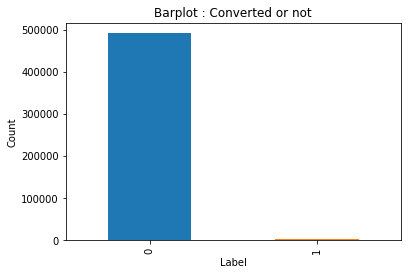

In [19]:
df.label.value_counts().plot(kind="bar")
plt.title("Barplot : Converted or not")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [20]:
print(100*df[df["label"]==1].shape[0]/df.shape[0])

0.5308690125674701


#### Classes désequilibrées : 0.53% de conversion 

Nous pouvons aussi regarder les distributions des variables continues :

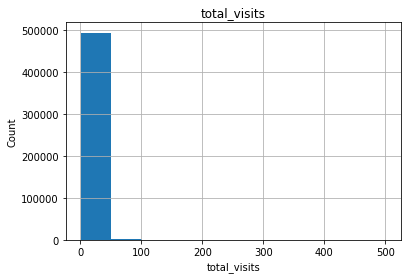

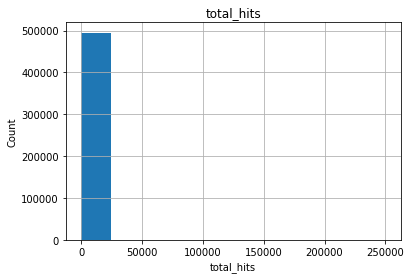

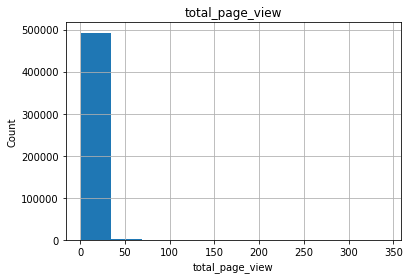

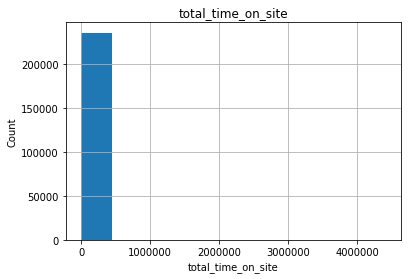

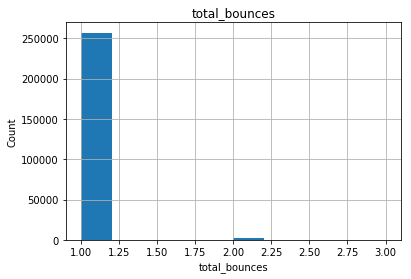

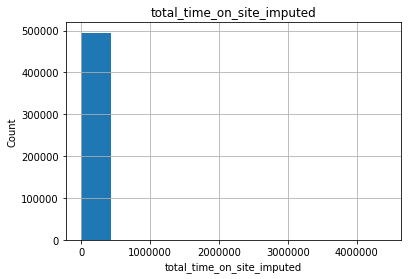

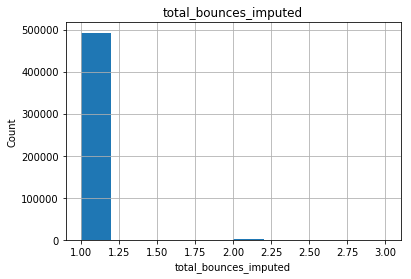

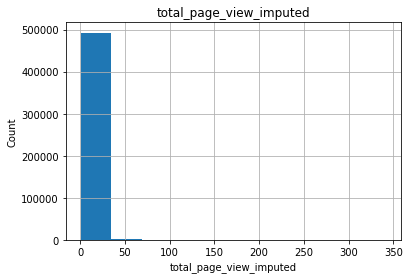

In [21]:
for colname, serie in df.iteritems():
    if serie.dtype.name is not 'category':
        serie.hist()
        plt.title(colname)
        plt.xlabel(colname)
        plt.ylabel("Count")
        plt.show()

Et pour les variables catégorielles nous pouvons regarder les diagrammes en barres :

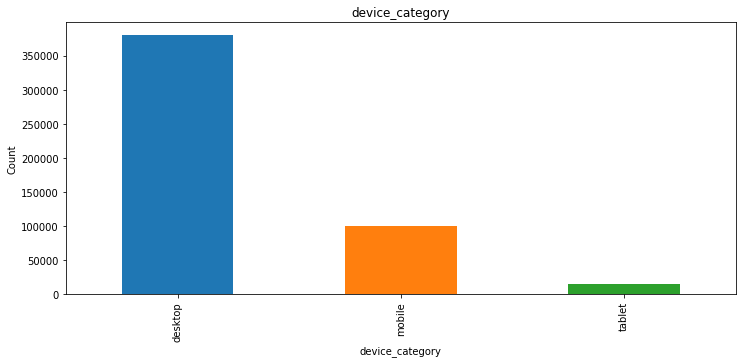

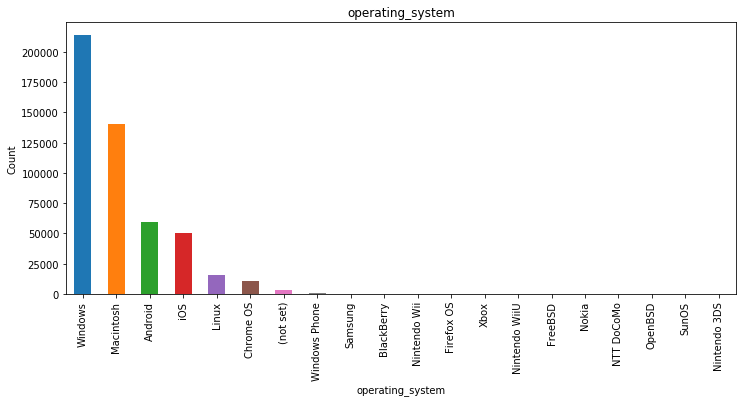

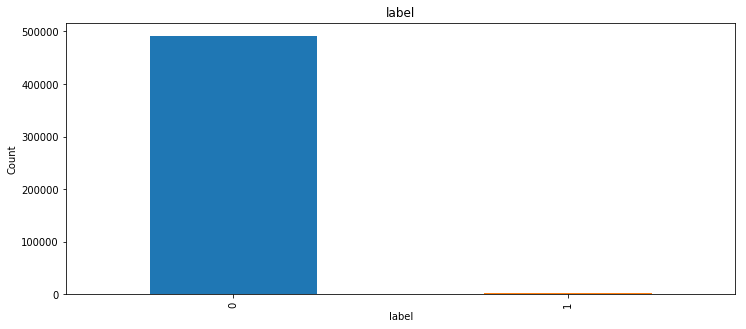

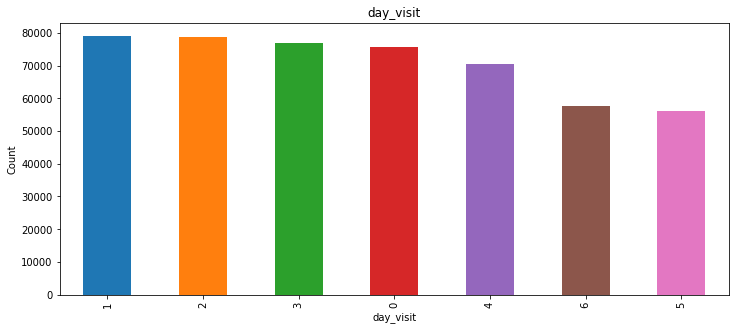

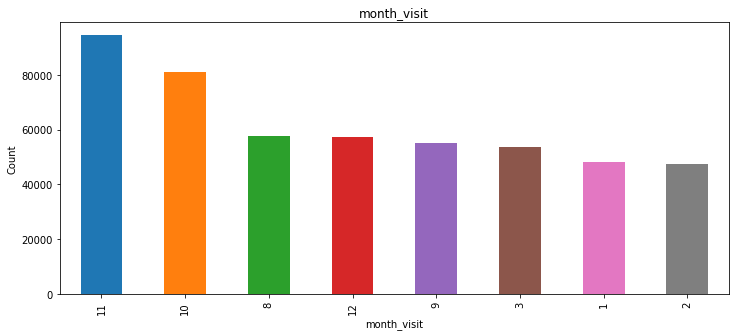

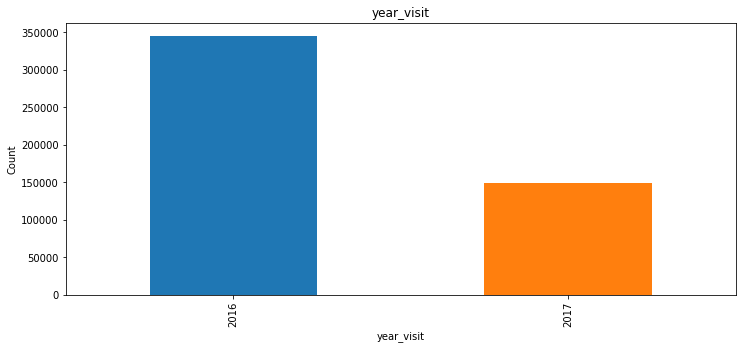

In [22]:
for colname, serie in df.iteritems():
    if serie.dtype.name is 'category' and colname not in ["geo_country","url_de_provenance","visit_day","visitor_id","visit_id"]:
        serie.value_counts().plot(kind="bar",figsize=(12,5))
        plt.title(colname)
        plt.xlabel(colname)
        plt.ylabel("Count")
        plt.show()

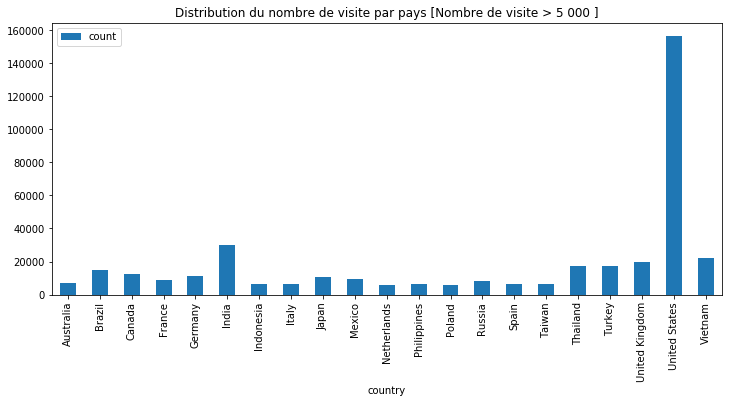

In [23]:
new = df.filter(['geo_country','visit_day'], axis=1)
df_geo_country = new.groupby(['geo_country']).count().reset_index()
df_geo_country.columns = ['country', 'count']
is_best_geo_country =  df_geo_country['count'] >= 5000
is_best_geo_country_df = df_geo_country[is_best_geo_country]
is_best_geo_country_df.plot(x='country',y=["count"], kind="bar",figsize=(12,5), title="Distribution du nombre de visite par pays [Nombre de visite > 5 000 ]");

## Analyse bivariée

L'analyse bivariée va consister à regarder l'influence de différentes variables sur la variable cible.

Ainsi nous allons pouvoir constater si certaines variables sont extrêmement discriminantes.

Nous allons prendre pour exemple la variable `total_visits`.

### Influence de la variable `total_visits`

Une façon classique de comparer une variable qualitative et une variable quantitative est de tracer un boxplot de la variable quantitative en fonction de la varible qualitative. Nous utiliserons le violin plot, cette représentation a l'avantage de montrer la distribution des données en plus :


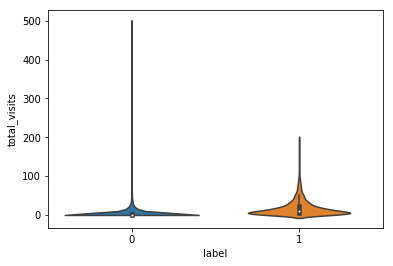

In [24]:
sns.violinplot(x="label", y="total_visits", data=df)
plt.show()

Une autre façon de faire peut être de tracer les histogrammes de la variable qualitative en fonction des deux groupes :

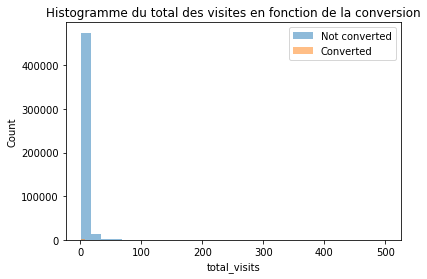

In [25]:
bins=30
plt.hist(df.total_visits.loc[df.label==0], bins, alpha=0.5, label='Not converted')
plt.hist(df.total_visits.loc[df.label==1], bins, alpha=0.5, label='Converted')
plt.title("Histogramme du total des visites en fonction de la conversion")
plt.ylabel("Count")
plt.xlabel("total_visits")
plt.legend(loc='upper right')
plt.show()

Dans notre cas d'espèce, le violin plot est plus explicite(le deuxième graphique ne ressort pas l'histogramme de la deuxième classe *converted*, ceci dû à une différence importante dans l'ordre de grandeur), il ressort que la majorité des visiteurs ayant convertit ont un nombre de visite compris entre 0 et 25, cet également dans cet intervalle qu'on retrouve le pic des visiteurs n'ayant pas convertit.

### Influence de la variable `month_visit`

La variable `month_visit` est une variable catégorielle, nous allons évaluer l'influence d'une variable qualitative sur une autre variable qualitative (label).

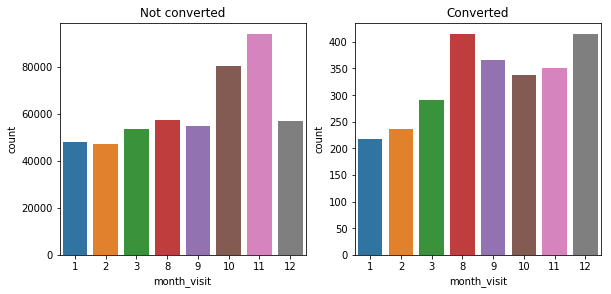

In [26]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(9.7, 4.27)
sns.countplot(df.month_visit.loc[df.label==0], ax=ax[0]).set_title("Not converted")
sns.countplot(df.month_visit.loc[df.label==1], ax=ax[1]).set_title("Converted")
fig.show()

In [27]:
pd.crosstab(df.label, df.month_visit).apply(
    lambda x: np.round(100*x / x.sum(), 2), axis=1)

month_visit,1,2,3,8,9,10,11,12
label,,,,,,,,
0,9.74,9.59,10.86,11.66,11.15,16.36,19.10,11.53
1,8.30,9.02,11.04,15.80,13.93,12.83,13.32,15.76


Nous constatons que la majorité des visiteurs ayant convertis ont effectués leur première visite aux mois **d'août[8 - 15.80%]** et de **décembre[12 - 15.76%]**, ceci peut être dû à une recherche d'idée de cadeaux. 

### Influence de la variable `total_time_on_site`

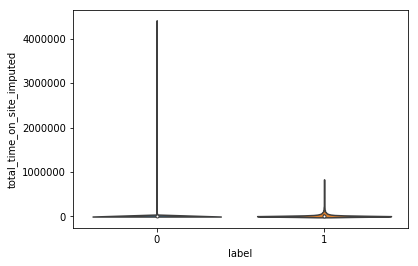

In [28]:
sns.violinplot(x="label", y="total_time_on_site_imputed", data=df)
plt.show()

### Influence de la variable `total_page_view`

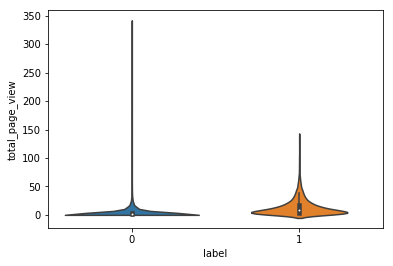

In [29]:
sns.violinplot(x="label", y="total_page_view", data=df)
plt.show()

### Influence de la variable `total_hits`

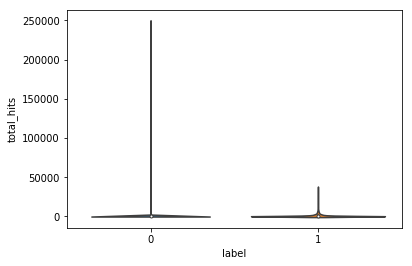

In [30]:
sns.violinplot(x="label", y="total_hits", data=df)
plt.show()

### Influence de la variable `total_bounces`

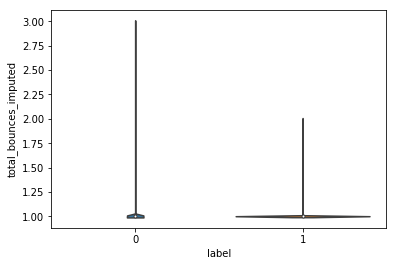

In [31]:
sns.violinplot(x="label", y="total_bounces_imputed", data=df)
plt.show()

### Influence de la variable `device_category`

In [32]:
ct = pd.crosstab(df.label, df.device_category)\
.apply(lambda x: np.round(100*x / x.sum(), 2), axis=1)

ct

device_category,desktop,mobile,tablet
label,,,
0,76.67,20.22,3.12
1,91.89,6.93,1.18


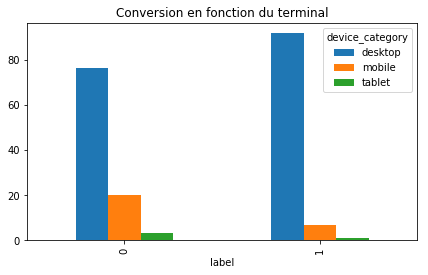

In [33]:
ct.plot(y=["desktop","mobile","tablet"], 
        kind="bar",figsize=(7,4), 
        title="Conversion en fonction du terminal");

Nous remarqons qu'une grande partie des visites et des conversions s'effectue sur des **desktop**, suivi des **téléphones mobiles** en 2ème position.

### Influence de la variable `geo_country`

In [34]:
ct = pd.crosstab(df.label, df.geo_country)\
.apply(lambda x: np.round(100*x / x.sum(), 2), axis=1)

ct

geo_country,(not set),Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua & Barbuda,Argentina,Armenia,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
label,,,,,,,,,,,,,,,,,,,,,
0,0.2,0.01,0.09,0.33,0.0,0.0,0.01,0.0,0.61,0.04,...,0.45,4.03,31.34,0.07,0.01,0.27,4.47,0.01,0.0,0.01
1,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.11,0.00,...,0.04,0.27,94.71,0.04,0.00,0.46,0.00,0.00,0.0,0.00


Les **USA [United States]** se taille la part du lion en terme de visite et de conversion **(94.71%)**.

# Analyse multivariée

Ce genre d'analyse est potentiellement infinie. Nous pouvons par exemple croiser plus de deux variables :


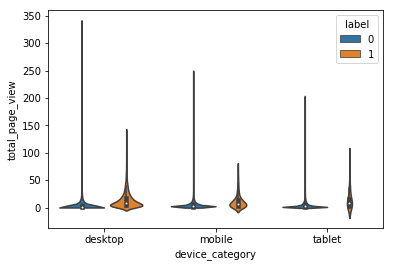

In [35]:
sns.violinplot(x="device_category", y="total_page_view", hue="label", data=df)
plt.show()

Ou regarder les corrélations entre elles :

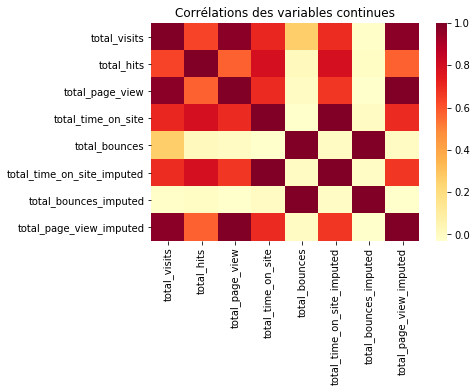

In [36]:
df2 = df
df2 = df2.drop(["visitor_id","visit_id"], axis=1)
sns.heatmap(df2.corr(), cmap="YlOrRd")
plt.title("Corrélations des variables continues")
plt.show()

Enfin, de nombreuses méthodes permettent d'explorer un dataset. De façon non exhaustive on peut citer l'analyse en composantes principales (la plus connue!), mais aussi l'analyse factorielle des composantes, analyse des composantes multiples, etc.

# Preprocessing pour scikit-learn

Malheureusement scikit-learn ne reconnait pas les objets de type DataFrame directement, notamment les types catégoriels. Il faut donc (encore) préparer nos données afin que les méthodes de scikit-learn puissent les interpréter. Scikit learn requiert un encodage numérique des ces variables. Nous allons donc devoir encoder nos variables explicatives catégorielles à l'aide de variables indicatrices. Cela signifie qu'une variable comme device_category qui a trois niveaux, sera représentée par trois variables `device_category_mobile`, `device_category_desktop`, et `device_category_tablet` pour signifier l'appartenance à un des trois niveaux. Cela introduit de la redondance dans les données mais les modèles sauront faire le tri.

La variable cible est un cas à part: scikit learn a simplement besoin de la voir comme une variables numérique.

In [37]:
categorical_features = df.columns[df.dtypes == "category"].tolist()
print(categorical_features)

['visitor_id', 'visit_id', 'visit_day', 'device_category', 'operating_system', 'geo_country', 'url_de_provenance', 'label', 'day_visit', 'month_visit', 'year_visit']


In [38]:
print("'label' avant la modification de type :\n", df.label.dtype)
print(df.label.head())
df["label"] = df["label"].astype(int)
print("'label' après la modification de type :\n", df.label.dtype)
print(df.label.head())

'label' avant la modification de type :
 category
0    0
1    0
2    0
3    0
4    0
Name: label, dtype: category
Categories (2, int64): [0, 1]
'label' après la modification de type :
 int64
0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64


##### Attention `label` ne doit pas être converti;
####  Nous ne convertirons que `device_category`, car elle possède 03 modalités. les autres variables catégorielles possèdent plus de 05 modalités, l'ajout des colonnes supplémentaires avec beaucoup de trous dans les données peux s'averer contre productif pour le modèle qui traitera les trous comme du bruit.

In [39]:
categorical_features = [x for x in categorical_features if x in "device_category"]
print(categorical_features)

['device_category']


In [40]:
df_dummies = pd.get_dummies(df[categorical_features])
df_dummies.head()

,device_category_desktop,device_category_mobile,device_category_tablet
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [41]:
# on concatène ensuite avec le dataset original
df = pd.concat([df.drop(categorical_features, axis=1), df_dummies], axis=1)
df.head()

,visitor_id,visit_id,visit_day,operating_system,geo_country,total_visits,total_hits,url_de_provenance,total_page_view,total_time_on_site,...,label,total_time_on_site_imputed,total_bounces_imputed,total_page_view_imputed,day_visit,month_visit,year_visit,device_category_desktop,device_category_mobile,device_category_tablet
0,2956552361585281319,1486205902,20170204,Macintosh,United States,28,784,https://www.google.com/,28.0,27020.0,...,0,27020.0,1.0,28.0,5,2,2017,1,0,0
1,8505108373105734622,1473273653,20160907,Windows,United States,34,1156,https://www.google.com/,28.0,119612.0,...,0,119612.0,1.0,28.0,2,9,2016,1,0,0
2,4053455542325366513,1479951049,20161123,Windows,Mexico,23,529,https://www.google.com.mx/,16.0,10856.0,...,0,10856.0,1.0,16.0,2,11,2016,1,0,0
3,77898258192508950,1487715789,20170221,Windows,Puerto Rico,40,1600,https://www.google.com.pr/,31.0,50400.0,...,0,50400.0,1.0,31.0,1,2,2017,1,0,0
4,2673551203292988105,1480157570,20161126,Windows,Israel,22,484,https://www.google.com/,15.0,9504.0,...,0,9504.0,1.0,15.0,5,11,2016,1,0,0


* Nous utiliserons LabelEncoder() pour encoder les features catégorielles ayant un nombre important de modalités

In [42]:
vars_cat = ["operating_system","geo_country",
            "url_de_provenance", "day_visit",
            "month_visit","year_visit"]

In [43]:
from sklearn.preprocessing import LabelEncoder
# donnees catégorielles
le = dict()
# Encodage donnees catégorielles
print("Exécuter une seule fois :")
for c in vars_cat:
    print('encode:', c)
    le[c] = LabelEncoder()
    le[c].fit(df[c])
    df[c] = le[c].transform(df[c])
    print(le[c].classes_)

Exécuter une seule fois :
encode: operating_system
['(not set)' 'Android' 'BlackBerry' 'Chrome OS' 'Firefox OS' 'FreeBSD'
 'Linux' 'Macintosh' 'NTT DoCoMo' 'Nintendo 3DS' 'Nintendo Wii'
 'Nintendo WiiU' 'Nokia' 'OpenBSD' 'Samsung' 'SunOS' 'Windows'
 'Windows Phone' 'Xbox' 'iOS']
encode: geo_country
['(not set)' 'Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Antigua & Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia & Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Caribbean Netherlands' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo - Brazzaville' 'Congo - Kinshasa' 'Cook Islands' 'Costa Rica'
 'Croatia' 'Curaçao' 'Cyprus' 'Czechia' 'Côte d’Ivoire' 'Denmark'
 'Djibouti

In [44]:
df.head()

,visitor_id,visit_id,visit_day,operating_system,geo_country,total_visits,total_hits,url_de_provenance,total_page_view,total_time_on_site,...,label,total_time_on_site_imputed,total_bounces_imputed,total_page_view_imputed,day_visit,month_visit,year_visit,device_category_desktop,device_category_mobile,device_category_tablet
0,2956552361585281319,1486205902,20170204,7,208,28,784,10215,28.0,27020.0,...,0,27020.0,1.0,28.0,5,1,1,1,0,0
1,8505108373105734622,1473273653,20160907,16,208,34,1156,10215,28.0,119612.0,...,0,119612.0,1.0,28.0,2,4,0,1,0,0
2,4053455542325366513,1479951049,20161123,16,130,23,529,9738,16.0,10856.0,...,0,10856.0,1.0,16.0,2,6,0,1,0,0
3,77898258192508950,1487715789,20170221,16,159,40,1600,9851,31.0,50400.0,...,0,50400.0,1.0,31.0,1,1,1,1,0,0
4,2673551203292988105,1480157570,20161126,16,97,22,484,10215,15.0,9504.0,...,0,9504.0,1.0,15.0,5,6,0,1,0,0


Enfin, il nous faut séparer les variables explicatives (features) de la variable cible (target).

Nous allons aussi retirer les variables `total_time_on_site_imputed`,`total_bounces_imputed`. En effet, dans le processus que nous allons appliquer par la suite, nous allons séparer en deux échantillons distincts les données (train et test), et il faut que le processus appliqué sur le test ne soit pas appris sur celui-ci, mais uniquement sur le train.

In [45]:
#Sauvegarde du dataset original
df_copy = df

In [46]:
y = df.label
X = df.drop(["label","total_time_on_site_imputed",
             "total_bounces_imputed","total_page_view_imputed","visit_day"], axis=1)

In [47]:
X.head()

,visitor_id,visit_id,operating_system,geo_country,total_visits,total_hits,url_de_provenance,total_page_view,total_time_on_site,total_bounces,day_visit,month_visit,year_visit,device_category_desktop,device_category_mobile,device_category_tablet
0,2956552361585281319,1486205902,7,208,28,784,10215,28.0,27020.0,NaN,5,1,1,1,0,0
1,8505108373105734622,1473273653,16,208,34,1156,10215,28.0,119612.0,NaN,2,4,0,1,0,0
2,4053455542325366513,1479951049,16,130,23,529,9738,16.0,10856.0,NaN,2,6,0,1,0,0
3,77898258192508950,1487715789,16,159,40,1600,9851,31.0,50400.0,NaN,1,1,1,1,0,0
4,2673551203292988105,1480157570,16,97,22,484,10215,15.0,9504.0,NaN,5,6,0,1,0,0


In [48]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [49]:
X.isna().sum()

visitor_id                      0
visit_id                        0
operating_system                0
geo_country                     0
total_visits                    0
total_hits                      0
url_de_provenance               0
total_page_view                12
total_time_on_site         259444
total_bounces              235577
day_visit                       0
month_visit                     0
year_visit                      0
device_category_desktop         0
device_category_mobile          0
device_category_tablet          0
dtype: int64

In [50]:
X.dtypes

visitor_id                 category
visit_id                   category
operating_system              int64
geo_country                   int64
total_visits                  int64
total_hits                    int64
url_de_provenance             int64
total_page_view             float64
total_time_on_site          float64
total_bounces               float64
day_visit                     int64
month_visit                   int64
year_visit                    int64
device_category_desktop       uint8
device_category_mobile        uint8
device_category_tablet        uint8
dtype: object

In [51]:
y.dtype

dtype('int64')

## Train, Test

Etant donné que nous avons à disposition un jeu de données intégralement labellisé, on pourrait être tenté d'entrainer notre modèle sur l'intégralité des données. Néanmoins, cela nous empêcherait d'avoir une bonne procédure d'évaluation de notre modèle. En effet, nous devons laisser une partie du jeu de données complètement isolée de notre processus de création de modèle. Cette partie isolée se nomme test, l'autre partie qui nous servira à entrainer notre modèle se nomme train. Cette séparation des données permettra ainsi de voir comment notre modèle se comporte face à de nouvelles données auxquelles il n'a jamais été confronté.

Le procédé est simple avec scikit-learn :

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=777)

In [53]:
print("Train dimension :")
print(X_train.shape)
print("Test dimension :")
print(X_test.shape)

Train dimension :
(395879, 16)
Test dimension :
(98970, 16)


Nous allons donc utiliser les **98 970** individus mis de côté afin d'évaluer de façon objective la qualité de notre modèle.

## Un modèle de base : la régression logistique

Nous avons un problème de classification supervisée binaire, il est donc logique de penser en premier lieu à effectuer une régression logistique. Ce modèle est simple à mettre en place et a l'avantage d'être très facilement explicable (les coefficients de ce modèle sont le reflet de l'implication de la variable sur la cible).

Dans scikit-learn, la régression logistique est toujours fournie avec une régularisation L1 ou L2. Cela ne pose pas de problème.

Testons donc un premier modèle qui nous servira de baseline.

Nous allons aussi introduire l'imputation sur les données sur les données train, que nous appliquerons ENSUITE sur les données test.

## Imputation train / test

In [54]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')

df_scoring_train = X_train[['visitor_id','visit_id']]
df_scoring_test = X_test[['visitor_id','visit_id']]
#Suppression des variables visitor_id et visit_id
X_train = X_train.drop(["visitor_id","visit_id"], axis=1)
imp.fit(X_train) # La médiane est stockée dans l'objet "imp"
X_train_impute = imp.transform(X_train)
X_test = X_test.drop(["visitor_id","visit_id"], axis=1)
X_test_impute = imp.transform(X_test)

## Logistic regression

In [55]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(penalty="l1", solver = "liblinear")
logit = logit.fit(X_train_impute, y_train)

pred_train = logit.predict(X_train_impute)
pred_test = logit.predict(X_test_impute)

pred_proba_train = logit.predict_proba(X_train_impute)[:,1]
pred_proba_test = logit.predict_proba(X_test_impute)[:,1]

Coefficients de la régression logistique

Un des avantages de la régression logistique est que nous pouvons obtenir les coefficients associés à chacune des variables. Nous avons utilisé une pénalisation L1, les coefficients sont donc seuillés à 0 si ils ont été jugés "inutiles" par le modèle.

Regardons ces coefficients :

In [56]:
coefficients = pd.Series(logit.coef_.flatten(), index=X_train.columns)\
.sort_values(ascending=False)
coefficients

year_visit                 0.213906
total_visits               0.081650
month_visit                0.063237
total_page_view            0.032400
geo_country                0.020589
total_time_on_site         0.000001
url_de_provenance         -0.000160
total_hits                -0.000745
operating_system          -0.066257
day_visit                 -0.080304
device_category_desktop   -1.938754
total_bounces             -2.601860
device_category_tablet    -3.107833
device_category_mobile    -3.311042
dtype: float64

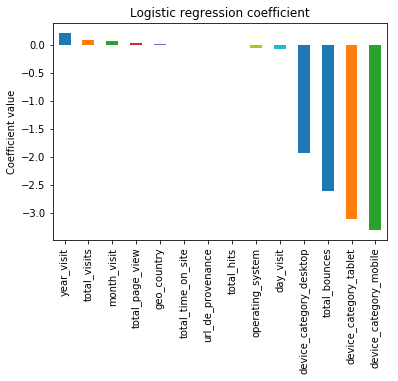

In [57]:
coefficients.plot(kind="bar")
plt.title("Logistic regression coefficient")
plt.ylabel("Coefficient value")
plt.show()

## Evaluation

De nombreuses métriques sont disponibles pour évaluer la performance d'un modèle dans scikit-learn.

In [58]:
from sklearn import metrics


def classification_metrics(y, y_pred):
    return pd.DataFrame(
        {
            "accuracy_score": metrics.accuracy_score(y_true=y, y_pred=y_pred),
            "f1_score": metrics.f1_score(y_true=y, y_pred=y_pred),
            "precision_score": metrics.precision_score(
                y_true=y, y_pred=y_pred),
            "recall_score": metrics.recall_score(y_true=y, y_pred=y_pred)
        },
        index=[0])

* Fonction permettant d'afficher la matrice de correlation

In [205]:
from matplotlib.collections import QuadMesh
import matplotlib.font_manager as fm

def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1
#

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=fz)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'g'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.27, 0.30, 0.27, 1.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '%s\n%.2f%%' %(cell_val, per)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.35, 0.8, 0.55, 1.0]
        else:
            oText.set_color('r')

    return text_add, text_del
#

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col
    #print ('\ndf_cm:\n', df_cm, '\n\b\n')
#

def pretty_plot_confusion_matrix(df_cm, annot=True, cmap="Oranges", fmt='.2f', fz=11,
      lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    ax = sns.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='w', fmt=fmt)

    #set ticklabels rotation
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 10)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []; text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Confusion matrix')
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    plt.tight_layout()  #set layout slim
    plt.show()
#

def plot_confusion_matrix_from_data(y_test, predictions, columns=None, annot=True, cmap="Oranges",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[5,5], show_null_values=0, pred_val_axis='lin'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """
    from sklearn.metrics import confusion_matrix
    from pandas import DataFrame

    #data
    if(not columns):
        #labels axis integer:
        ##columns = range(1, len(np.unique(y_test))+1)
        #labels axis string:
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions)
    cmap = 'Oranges';
    fz = 11;
    figsize=[9,9];
    show_null_values = 2
    df_cm = DataFrame(confm, index=columns, columns=columns)
    pretty_plot_confusion_matrix(df_cm, fz=fz, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)


In [59]:
print("Classification metrics for train data")
print(classification_metrics(y_train, pred_train))
print("Classification metrics for test data")
print(classification_metrics(y_test, pred_test))

Classification metrics for train data
   accuracy_score  f1_score  precision_score  recall_score
0        0.994711       0.0              0.0           0.0
Classification metrics for test data
   accuracy_score  f1_score  precision_score  recall_score
0        0.994534  0.003683              0.5      0.001848


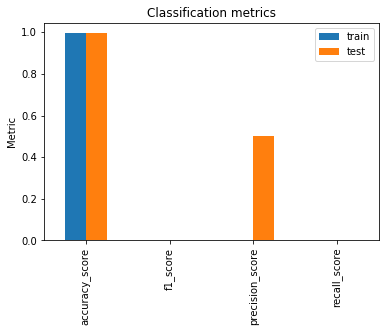

In [60]:
pd.concat(
    [
        classification_metrics(y_train, pred_train).T[0].rename("train"),
        classification_metrics(y_test, pred_test).T[0].rename("test")
    ],
    axis=1).plot(kind="bar")
plt.title("Classification metrics")
plt.ylabel("Metric")
plt.show()

In [61]:
def roc_curves_plot(y_train, pred_proba_train, y_test, pred_proba_test,model_name):
    false_positive_rate_train, true_positive_rate_train, _ = metrics.roc_curve(
        y_train, pred_proba_train)
    roc_auc_train = metrics.auc(false_positive_rate_train,
                                true_positive_rate_train)

    false_positive_rate_test, true_positive_rate_test, _ = metrics.roc_curve(
        y_test, pred_proba_test)
    roc_auc_test = metrics.auc(false_positive_rate_test,
                               true_positive_rate_test)

    plt.title(model_name)
    plt.plot(
        false_positive_rate_train,
        true_positive_rate_train,
        'b',
        label='AUC Train = %0.4f' % roc_auc_train)
    plt.plot(
        false_positive_rate_test,
        true_positive_rate_test,
        'g',
        label='AUC Test = %0.4f' % roc_auc_test)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

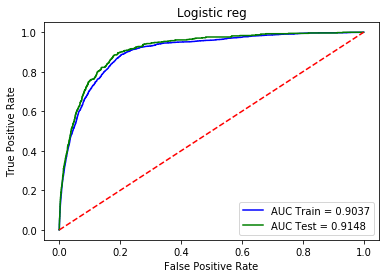

In [62]:
roc_curves_plot(y_train, pred_proba_train, y_test, pred_proba_test,"Logistic reg")

#### Matrice de confusion
* sur la prédiction du train

In [63]:
plot_confusion_matrix_from_data(y_train, pred_train,columns=['0','1'],figsize=[4,4])

,0,1
0,393785,8
1,2086,0


* sur la prédiction du test

In [64]:
plot_confusion_matrix_from_data(y_test, pred_test,columns=['0','1'],figsize=[4,4])

,0,1
0,98428,1
1,540,1


Nous avons à faire à des classes désequilibrées : 0.53% de conversion contre 99.47% de non conversion. Le modèle à du mal à apprendre de la classe minoritaire et donc, du mal à prédire les valeurs exactes pour cette classe malgré des valeurs à priori intéressantes pour l'Accuracy et l'AUC.

In [65]:
df_proba_train = pd.DataFrame(pred_proba_train, 
                              columns=['probabilité'])
df_scoring_logit1_train = pd.concat([df_scoring_train, df_proba_train], axis=1).dropna()
df_scoring_logit1_train.head()

,visitor_id,visit_id,probabilité
0,2956552361585281319,1486205902,0.001646
1,8505108373105734622,1473273653,0.001389
2,4053455542325366513,1479951049,0.030945
4,2673551203292988105,1480157570,0.000028
5,4416944155292105292,1480998195,0.008961


In [66]:
df_proba_test = pd.DataFrame(pred_proba_test, 
                              columns=['probabilité'])
df_scoring_logit1_test = pd.concat([df_scoring_test, df_proba_test], axis=1).dropna()
df_scoring_logit1_test.head()

,visitor_id,visit_id,probabilité
3,77898258192508950,1487715789,0.001605
6,8122877493638397703,1488677771,0.007177
12,7819505057607873348,1472030142,0.002532
16,3085264058968898596,1473635474,0.000144
21,8814603713346213513,1478090669,0.000481


In [69]:
df_scoring_logit1_test.to_csv("./scoring_utt_fr/df_scoring_logit1_test.csv", 
                              sep=',', header=["FullvisitorID","VisitID","Probabilité"])
df_scoring_logit1_train.to_csv("./scoring_utt_fr/df_scoring_logit1_train.csv", 
                              sep=',', header=["FullvisitorID","VisitID","Probabilité"])

## Cross validation et gridsearsh

Maintenant que nous avons un modèle de base, nous allons creuser un peu plus loin afin de l'améliorer en optimisant les hyperparamètres du modèle. Pour ce faire nous allons procéder par validation croisée. A l'aide de celle-ci, nous allons chercher quel(s) paramètre(s) nous donne(nt) le meilleur score et enfin nous évaluerons la qualité du modèle sur le jeu de données test.

Le paramètre que nous allons chercher à optimiser dans la régression logistique est le paramètre C qui correspond à l'inverse de la "force" de la régularisation. En résumé plus C est petit plus la régularisation sera forte.

Nous allons aussi tester deux types de régularisation: L1 ou L2.

In [70]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs
params = [{"C": [0.01, 0.2, 0.5, 1, 5, 5.2,5.6,6,7,8.5,8.9,9,9.2,9.5, 10, 20],
           "penalty": ["l1", "l2"]}]
logitCV = GridSearchCV(
    LogisticRegression(solver="liblinear"),
    params,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
logitCV = logitCV.fit(X_train_impute, y_train)

On peut récupérer les résultats de la recherche dans `cvresults` Regardons comment évolue le score :

In [71]:
df_cv_results = pd.DataFrame(logitCV.cv_results_)
df_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,23.249719,5.576805,0.066364,0.021473,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.896582,0.906237,0.906487,...,0.898194,0.007665,16,0.897957,0.897426,0.896694,0.899744,0.901128,0.898590,0.001620
1,18.757963,2.835808,0.059558,0.004220,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.880643,0.840091,0.852911,...,0.867032,0.017711,30,0.884121,0.826432,0.838912,0.887800,0.891989,0.865851,0.027489
2,40.428514,19.424627,0.060176,0.005399,0.2,l1,"{'C': 0.2, 'penalty': 'l1'}",0.904708,0.909719,0.911573,...,0.903495,0.006721,1,0.903255,0.902928,0.902247,0.905497,0.905868,0.903959,0.001449
3,20.475157,2.567811,0.065993,0.014106,0.2,l2,"{'C': 0.2, 'penalty': 'l2'}",0.861228,0.819541,0.897981,...,0.868837,0.027648,28,0.866458,0.806394,0.888184,0.892255,0.891764,0.869011,0.032720
4,67.501142,13.500272,0.065691,0.019470,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",0.904852,0.909574,0.911486,...,0.903317,0.006866,2,0.903156,0.902703,0.902015,0.905360,0.905787,0.903804,0.001496


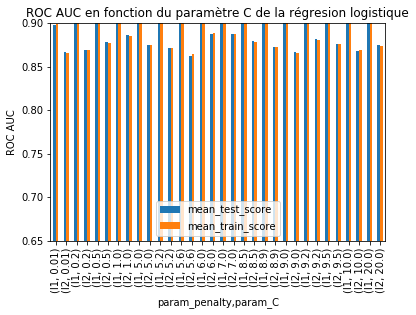

In [72]:
df_cv_results.set_index(["param_penalty",
                         "param_C"])[["mean_test_score",
                                      "mean_train_score"]].plot(
                                          kind="bar", ylim=(0.65, 0.9))
plt.ylabel("ROC AUC")
plt.title("ROC AUC en fonction du paramètre C de la régresion logistique")
plt.show()

In [73]:
# paramètre optimal
print("Best C parameter : ")
print(logitCV.best_params_["C"])
print("Best penalty parameter : ")
print(logitCV.best_params_["penalty"])

Best C parameter : 
0.2
Best penalty parameter : 
l1


In [74]:
pred_train = logitCV.predict(X_train_impute)
pred_test = logitCV.predict(X_test_impute)
pred_proba_train = logitCV.predict_proba(X_train_impute)[:,1]
pred_proba_test = logitCV.predict_proba(X_test_impute)[:,1]

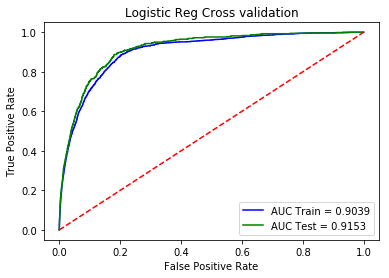

In [76]:
roc_curves_plot(y_train, pred_proba_train, y_test, pred_proba_test,"Logistic Reg Cross validation")

#### Matrice de confusion
* sur la prédiction du train

In [77]:
plot_confusion_matrix_from_data(y_train, pred_train,columns=['0','1'],figsize=[4,4])

,0,1
0,393786,7
1,2086,0


* sur la prédiction du test

In [78]:
plot_confusion_matrix_from_data(y_test, pred_test,columns=['0','1'],figsize=[4,4])

,0,1
0,98428,1
1,540,1


La matrice de confusion ne s'améliore pas, le déséquilibre dans les classes a un impact sur le modèle. Nous allons éssayer d'autres modèles

## Arbres de classification

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

clf_pipe = Pipeline([('imp', SimpleImputer(strategy='median')),
                     ('clf', DecisionTreeClassifier())])

In [81]:
params = [{
    "clf__max_depth": [3, 5, 10, None],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 5]
}]

In [82]:
treeCV = GridSearchCV(
    clf_pipe,
    params,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
treeCV = treeCV.fit(X_train, y_train)

In [86]:
pred_train = treeCV.predict(X_train_impute)
pred_test = treeCV.predict(X_test_impute)
pred_proba_train = treeCV.predict_proba(X_train_impute)[:, 1]
pred_proba_test = treeCV.predict_proba(X_test_impute)[:, 1]

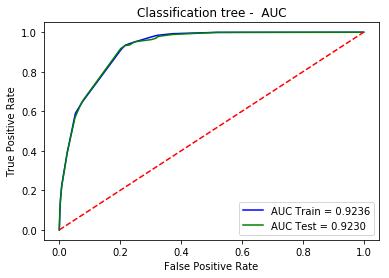

In [89]:
roc_curves_plot(y_train, pred_proba_train, y_test, pred_proba_test,"Classification tree -  AUC")

#### Matrice de confusion
* sur la prédiction du train

In [90]:
plot_confusion_matrix_from_data(y_train, pred_train,columns=['0','1'],figsize=[4,4])

,0,1
0,393793,0
1,2086,0


* sur la prédiction du test

In [91]:
plot_confusion_matrix_from_data(y_test, pred_test,columns=['0','1'],figsize=[4,4])

,0,1
0,98429,0
1,541,0


## Forêts aléatoires

In [92]:
from sklearn.ensemble import RandomForestClassifier

clf_pipe = Pipeline([('imp', SimpleImputer(strategy='median')),
                     ('clf', RandomForestClassifier())])

In [93]:
params = [{
    "clf__n_estimators": [10, 50, 100],
    "clf__max_features": [2, 4, 8]
    #     "clf__max_depth": [3, 5, 10, None],
    #     "clf__min_samples_leaf": [1, 2, 5]
}]

In [94]:
rfCV = GridSearchCV(
    clf_pipe,
    params,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
rfCV = rfCV.fit(X_train, y_train)

In [95]:
df_cv_results = pd.DataFrame(rfCV.cv_results_)
df_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_features,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.786311,1.038599,0.331873,0.055999,2,10,"{'clf__max_features': 2, 'clf__n_estimators': 10}",0.647044,0.642147,0.668161,...,0.649814,0.009712,9,0.998322,0.998334,0.998277,0.998336,0.998420,0.998338,0.000047
1,36.313401,1.711388,1.320793,0.140389,2,50,"{'clf__max_features': 2, 'clf__n_estimators': 50}",0.764821,0.741277,0.768400,...,0.753925,0.011938,6,0.997258,0.997365,0.997113,0.997446,0.997553,0.997347,0.000152
2,64.196908,1.802625,2.769384,0.734776,2,100,"{'clf__max_features': 2, 'clf__n_estimators': ...",0.783301,0.786955,0.809548,...,0.789042,0.011157,3,0.997349,0.997412,0.997390,0.997414,0.997679,0.997449,0.000117
3,10.217753,0.558639,0.282101,0.025360,4,10,"{'clf__max_features': 4, 'clf__n_estimators': 10}",0.675939,0.651191,0.673765,...,0.660663,0.013020,7,0.998265,0.998260,0.998274,0.998329,0.998430,0.998312,0.000064
4,45.823989,1.267305,1.533121,0.383898,4,50,"{'clf__max_features': 4, 'clf__n_estimators': 50}",0.758597,0.759424,0.786407,...,0.766238,0.010280,4,0.997221,0.997325,0.997025,0.997340,0.997551,0.997292,0.000171


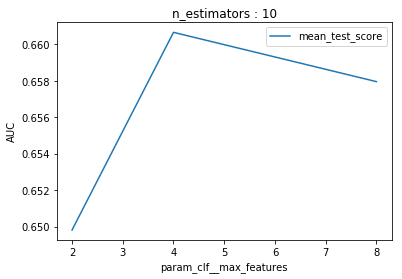

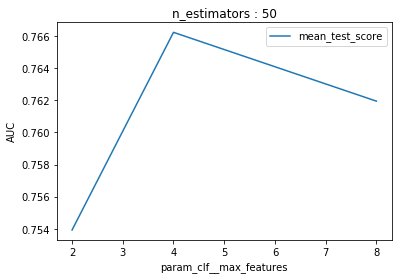

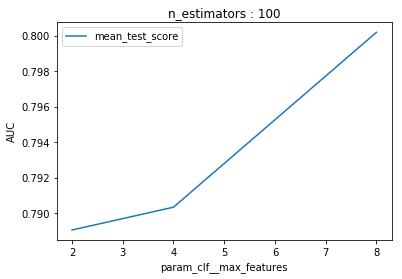

In [96]:
df_cv_results.loc[df_cv_results["param_clf__n_estimators"] == 10].set_index(
    "param_clf__max_features")[["mean_test_score"]].plot()
plt.title("n_estimators : 10")
plt.ylabel("AUC")
plt.show()

df_cv_results.loc[df_cv_results["param_clf__n_estimators"] == 50].set_index(
    "param_clf__max_features")[["mean_test_score"]].plot()
plt.title("n_estimators : 50")
plt.ylabel("AUC")
plt.show()

df_cv_results.loc[df_cv_results["param_clf__n_estimators"] == 100].set_index(
    "param_clf__max_features")[["mean_test_score"]].plot()
plt.title("n_estimators : 100")
plt.ylabel("AUC")
plt.show()

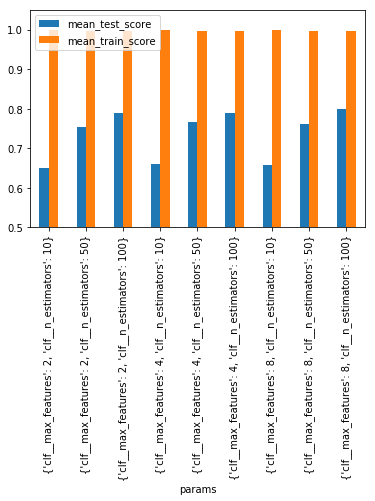

In [98]:
df_cv_results.set_index("params")[["mean_test_score",
                                   "mean_train_score"]].plot(
                                       kind="bar", ylim=(0.5, 1.05))

In [99]:
pred_train = rfCV.predict(X_train_impute)
pred_test = rfCV.predict(X_test_impute)
pred_proba_train = rfCV.predict_proba(X_train_impute)[:, 1]
pred_proba_test = rfCV.predict_proba(X_test_impute)[:, 1]

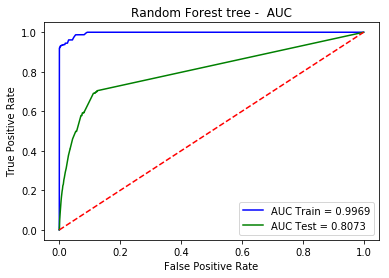

In [100]:
roc_curves_plot(y_train, pred_proba_train, 
                y_test, pred_proba_test,"Random Forest tree -  AUC")

#### Matrice de confusion
* sur la prédiction du train

In [101]:
plot_confusion_matrix_from_data(y_train, pred_train,columns=['0','1'],figsize=[4,4])

,0,1
0,393786,7
1,266,1820


* sur la prédiction du test

In [102]:
plot_confusion_matrix_from_data(y_test, pred_test,columns=['0','1'],figsize=[4,4])

,0,1
0,98409,20
1,538,3


In [104]:
df_proba_train = pd.DataFrame(pred_proba_train, 
                              columns=['probabilité'])
df_scoring_rf1_train = pd.concat([df_scoring_train, df_proba_train], axis=1).dropna()

df_proba_test = pd.DataFrame(pred_proba_test, 
                              columns=['probabilité'])
df_scoring_rf1_test = pd.concat([df_scoring_test, df_proba_test], axis=1).dropna()
df_scoring_rf1_test.head()

,visitor_id,visit_id,probabilité
3,77898258192508950,1487715789,0.000000
6,8122877493638397703,1488677771,0.006786
12,7819505057607873348,1472030142,0.000000
16,3085264058968898596,1473635474,0.000000
21,8814603713346213513,1478090669,0.000000


In [105]:
df_scoring_rf1_test.to_csv("./scoring_utt_fr/df_scoring_rd_f1_test.csv", 
                              sep=',', header=["FullvisitorID","VisitID","Probabilité"])
df_scoring_rf1_train.to_csv("./scoring_utt_fr/df_scoring_rd_f1_train.csv", 
                              sep=',', header=["FullvisitorID","VisitID","Probabilité"])

La matrice de confusion montre à suffisance que le modèle à du mal à prédire les bonnes valeurs pour la classe minoritaire, toutefois, elle reste meilleure par rapport à celles produites par les modèles précédents. Nous allons donc éssayer de rechercher les bonnes valeurs des hyperparamètres de ce modèle, afin d'optimiser ses prédictions. 

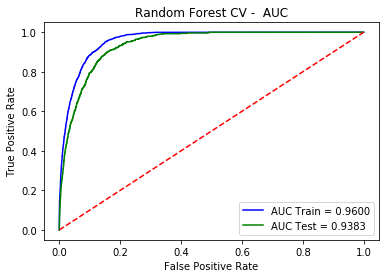

In [106]:
params = [{
    "clf__n_estimators": [10, 50, 100],
    "clf__max_features": [2, 4, 8],
    "clf__max_depth": [3, 5, 10, None],
    "clf__min_samples_leaf": [1, 2, 5]
}]
rfCV = GridSearchCV(
    clf_pipe,
    params,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    return_train_score=True)
rfCV = rfCV.fit(X_train, y_train)

pred_train = rfCV.predict(X_train_impute)
pred_test = rfCV.predict(X_test_impute)
pred_proba_train = rfCV.predict_proba(X_train_impute)[:, 1]
pred_proba_test = rfCV.predict_proba(X_test_impute)[:, 1]

roc_curves_plot(y_train, pred_proba_train, 
                y_test, pred_proba_test,"Random Forest CV -  AUC")

#### Matrice de confusion
* sur la prédiction du train

In [107]:
plot_confusion_matrix_from_data(y_train, pred_train,columns=['0','1'],figsize=[4,4])

,0,1
0,393793,0
1,2086,0


* sur la prédiction du test

In [108]:
plot_confusion_matrix_from_data(y_test, pred_test,columns=['0','1'],figsize=[4,4])

,0,1
0,98429,0
1,541,0


Une fois de plus, malgré les bonnes valeurs de l'AUC, la matrice de confusion montre que le modèle n'a pas bien appris de la classe minoritaire, et par conséquent, n'a fait aucune prédiction juste pour cette classe.

Nous allons procéder à un suréchantillonnage des observations de la classe minoritaire pour affecter la capacité de généralisation du modèle en utilisant la libraire **imblearn**. 

In [110]:
from imblearn.over_sampling import SMOTE

In [118]:
x_train_im, x_test_im, y_train_im, y_test_im = train_test_split(X, y,
                                                  test_size = 0.2,
                                                  random_state=777)

In [121]:
imp = SimpleImputer(strategy='median')
imp.fit(x_train_im)
x_test_impute_im = imp.transform(x_test_im)
x_train_im_impute_im = imp.transform(x_train_im)

sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train_im_impute_im, y_train_im)

In [162]:
def plot_2d_space(X, y, label='Classes'):
   colors = ['#1F77B4', '#FF7F0E']
   markers = ['o', 's']
   for l, c, m in zip(np.unique(y), colors, markers):
       plt.scatter(
           X[y==l, 0],
           X[y==l, 1],
           c=c, label=l, marker=m
       )
   plt.title(label)
   plt.legend(loc='upper right')

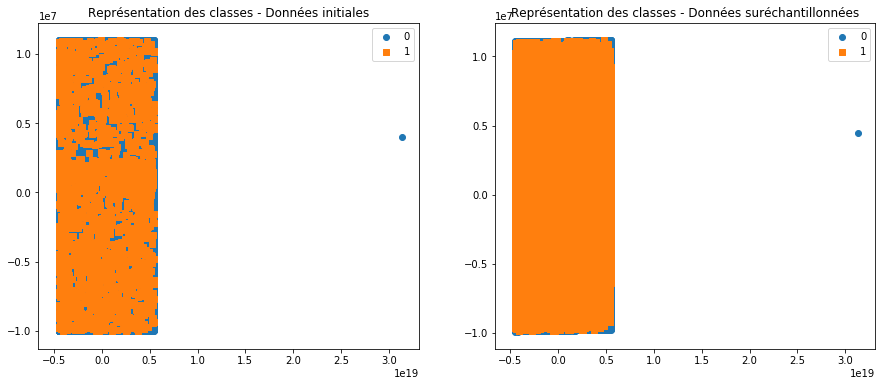

In [166]:
from sklearn.decomposition import PCA
import matplotlib.gridspec as gridspec

pca = PCA(n_components=2)
X_train_sm_pca = pca.fit_transform(x_train_res)
X_train_pca = pca.fit_transform(x_train_im_impute_im)
fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 3])
ax0 = plt.subplot(gs[0])
plot_2d_space(X_train_pca, y_train_im, 'Représentation des classes - Données initiales')
ax1 = plt.subplot(gs[1])
plot_2d_space(X_train_sm_pca, y_train_res, 'Représentation des classes - Données suréchantillonnées')
plt.show()

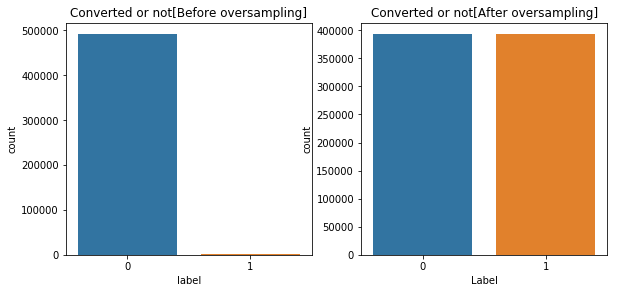

In [132]:
df_lib_res = pd.DataFrame(data=y_train_res,columns=["Label"])

fig, ax =plt.subplots(1,2)
fig.set_size_inches(9.7, 4.27)
sns.countplot(df.label, ax=ax[0])\
.set_title("Converted or not[Before oversampling]")
sns.countplot(df_lib_res.Label, ax=ax[1])\
.set_title("Converted or not[After oversampling]")
fig.show()

Comme le montre le graphique ci dessus, le suréchantillonnage à permis le re_équilibrage des classes dans notre jeu de données **train**.

Nous allons ensuite appliquer nos modèles aux données suréchantillonnées.

## Forêts aléatoires

In [169]:
params = [{
    "clf__n_estimators": [10, 50, 100],
    "clf__max_features": [2, 4, 8],
    "clf__max_depth": [3, 5, 10, None],
    "clf__min_samples_leaf": [1, 2, 5]
}]
rfCV = GridSearchCV(
    clf_pipe,
    params,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    return_train_score=True)

df_scoring_train = x_train_res[:,0:2]
df_scoring_test = x_test_impute_im[:,0:2]
#Suppression des variables visitor_id et visit_id
X_train = x_train_res[:,2:]

rfCV = rfCV.fit(X_train, y_train_res)

In [231]:
pred_train = rfCV.predict(X_train)
pred_test = rfCV.predict(x_test_impute_im[:,2:])
pred_proba_train = rfCV.predict_proba(X_train)[:, 1]
pred_proba_test = rfCV.predict_proba(x_test_impute_im[:,2:])[:, 1]

#### Courbe ROC - Forêt aléatoire après suréchantillonage

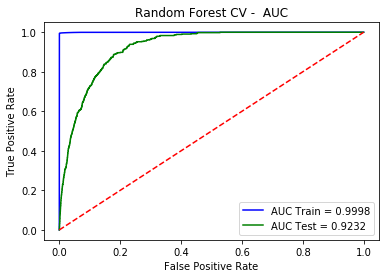

In [160]:
roc_curves_plot(y_train_res, pred_proba_train, 
                y_test_im, pred_proba_test,"Random Forest CV -  AUC")

#### Features importance - Forêt aléatoire après suréchantillonage

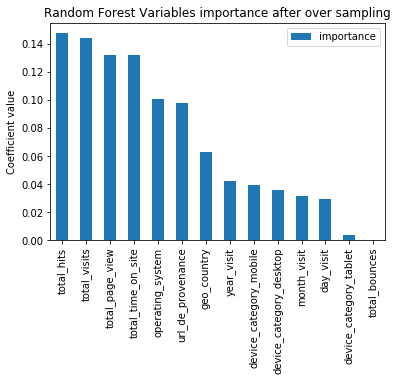

In [230]:
feature_importances = pd.DataFrame(rfCV.best_estimator_.named_steps['clf'].feature_importances_,
                                   index = X.columns[2:],
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot(kind="bar")
plt.title("Random Forest Variables importance after over sampling")
plt.ylabel("Coefficient value")
plt.show()

#### Matrice de confusion [Train] - Forêt aléatoire après suréchantillonage

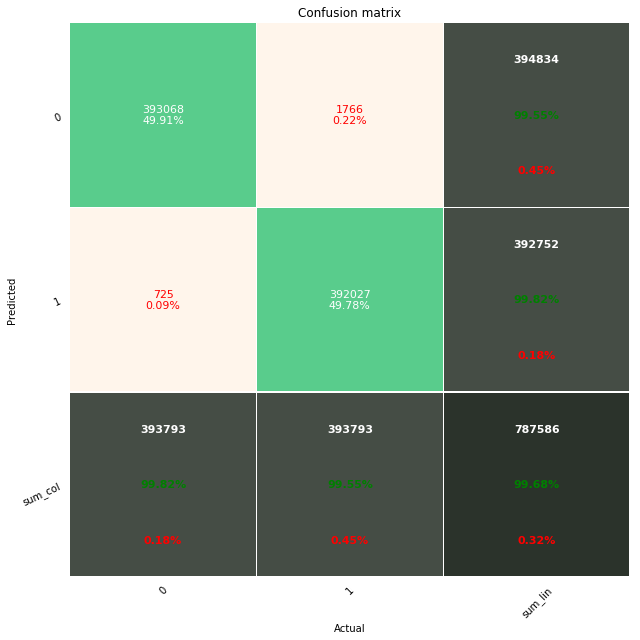

In [232]:
plot_confusion_matrix_from_data(y_train_res, pred_train,columns=['0','1'],figsize=[4,4])

Le suréchantillonage a permit d'améliorer les performances du modèle. Les obserations de la classe minoritaire sont bien prédites dans le jeu de données du train.

#### Matrice de confusion [Test] - Forêt aléatoire après suréchantillonage

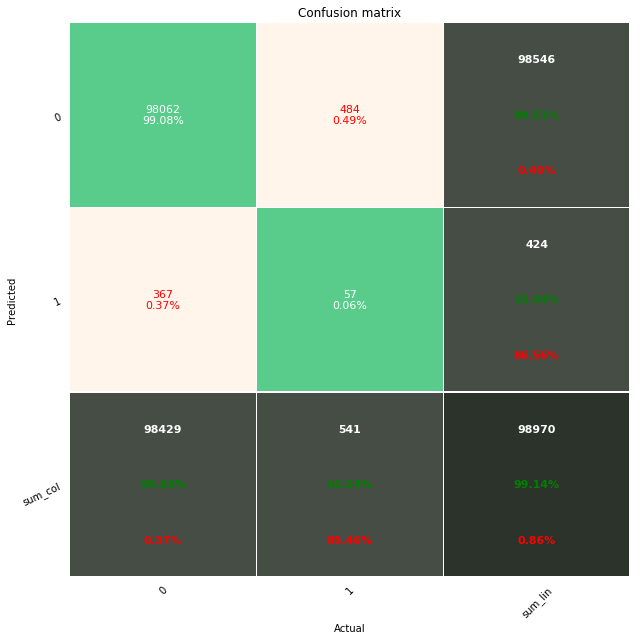

In [234]:
plot_confusion_matrix_from_data(y_test_im, pred_test,columns=['0','1'],figsize=[4,4])

Dans l'échantillon de test également, en plus de l'AUC général qui est acceptable (**0.92%**), le nombre de bonne prédiction effectué par le modèle, après le suréchantillonage a progréssé. **57 bonnes valeurs** prédite sur un total de **541 valeurs**, soit un pourcentage de bonne prédiction de **10.53%** dans la classe minoritaire contre **0%** réalisé par le modèle entraîné sur le jeu de donnée initial.

#### Métriques de classification [Train/Test] - Forêt aléatoire après suréchantillonage

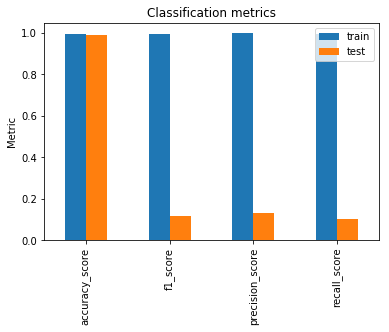

In [171]:
pd.concat(
    [
        classification_metrics(y_train_res, pred_train).T[0].rename("train"),
        classification_metrics(y_test_im, pred_test).T[0].rename("test")
    ],
    axis=1).plot(kind="bar")
plt.title("Classification metrics")
plt.ylabel("Metric")
plt.show()

In [179]:
d = {'visitor_id': df_scoring_train[:,0], 
     'visit_id': df_scoring_train[:,1], 
     "probabilité":pred_proba_train}
df = pd.DataFrame(data=d)
df["visitor_id"] = pd.Categorical(df["visitor_id"], ordered=False)
df["visit_id"] = pd.Categorical(df["visit_id"], ordered=False)
df.head()

,visitor_id,visit_id,probabilité
0,7.557324e+18,1.490276e+09,0.095607
1,1.144756e+18,1.478924e+09,0.009177
2,6.900507e+18,1.478538e+09,0.069755
3,6.986006e+17,1.487355e+09,0.000622
4,7.489787e+17,1.474151e+09,0.000003


In [180]:
df.to_csv("./scoring_utt_fr/df_scoring_finalRF_train.csv", 
                              sep=',', header=["FullvisitorID","VisitID","Probabilité"])

## Logistic regression
Nous allons utiliser la Regression logistique en appliquant les meilleurs valeurs trouvées plus haut pour les hyperparamètres (penalty="l1", solver="liblinear", C=0.2).

In [239]:
logit = LogisticRegression(penalty="l1", solver = "liblinear", C=0.2)
logit = logit.fit(X_train, y_train_res)
pred_train = logit.predict(X_train)
pred_test = logit.predict(x_test_impute_im[:,2:])
pred_proba_train = logit.predict_proba(X_train)[:, 1]
pred_proba_test = logit.predict_proba(x_test_impute_im[:,2:])[:, 1]

In [240]:
X_train_df = pd.DataFrame(data=X_train, 
                          columns=["operating_system","geo_country","total_visits","total_hits",
                                   "url_de_provenance","total_page_view","total_time_on_site","total_bounces",
                                   "day_visit","month_visit","year_visit","device_category_desktop","device_category_mobile",
                                   "device_category_tablet"])
coefficients = pd.Series(logit.coef_.flatten(), index=X_train_df.columns)\
.sort_values(ascending=False)
coefficients

year_visit                 0.373814
month_visit                0.123944
total_visits               0.115577
total_page_view            0.081988
geo_country                0.022072
total_time_on_site         0.000014
url_de_provenance         -0.000237
total_hits                -0.001190
operating_system          -0.072764
day_visit                 -0.111298
device_category_desktop   -0.487091
total_bounces             -0.863751
device_category_mobile    -1.835455
device_category_tablet    -1.856516
dtype: float64

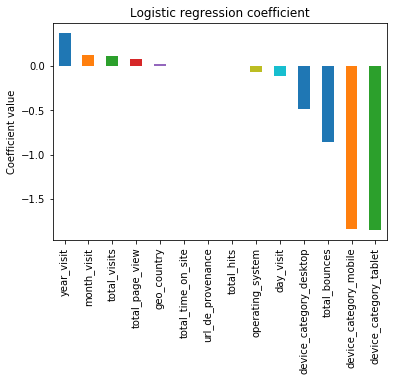

In [241]:
coefficients.plot(kind="bar")
plt.title("Logistic regression coefficient")
plt.ylabel("Coefficient value")
plt.show()

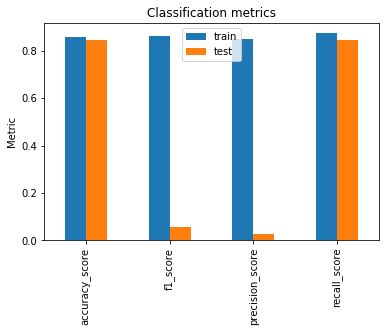

In [242]:
pd.concat(
    [
        classification_metrics(y_train_res, pred_train).T[0].rename("train"),
        classification_metrics(y_test_im, pred_test).T[0].rename("test")
    ],
    axis=1).plot(kind="bar")
plt.title("Classification metrics")
plt.ylabel("Metric")
plt.show()

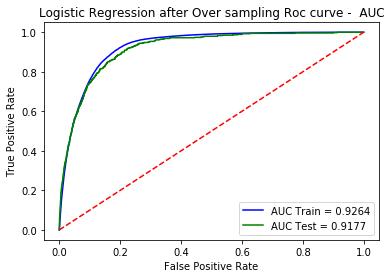

In [243]:
roc_curves_plot(y_train_res, pred_proba_train, 
                y_test_im, pred_proba_test,"Logistic Regression after Over sampling Roc curve -  AUC")

#### Matrice de confusion [Train] - Regression Logistique après suréchantillonage

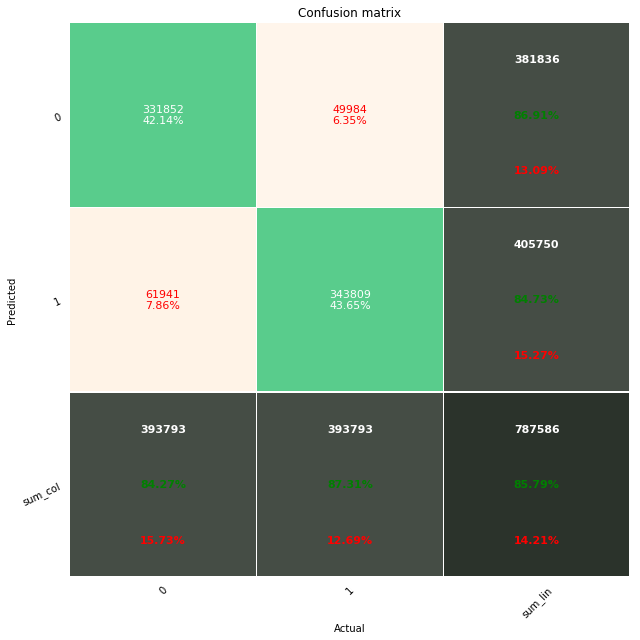

In [244]:
plot_confusion_matrix_from_data(y_train_res, pred_train,columns=['0','1'],figsize=[4,4])

#### Matrice de confusion [Test] - Regression Logistique après suréchantillonage

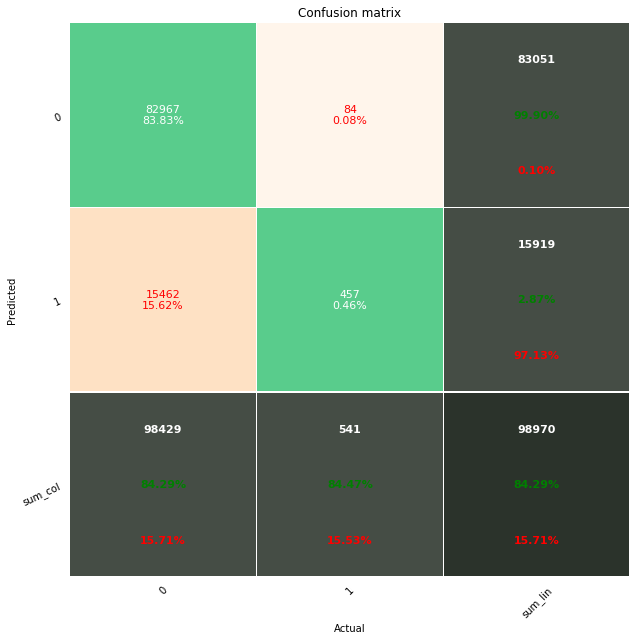

In [245]:
plot_confusion_matrix_from_data(y_test_im, pred_test,columns=['0','1'],figsize=[4,4])

Ce modèle (Regréssion logistique avec pénalité `l1`) se généralise beaucoup plus sur l'ensemble des deux classes après le suréchantillonage. En plus de **l'AUC du train** qui est acceptable (**0.92%**), le nombre de bonne prédiction effectué par le modèle, après le suréchantillonage a progréssé. **457 bonnes valeurs** prédite sur un total de **541 valeurs**, soit un pourcentage de bonne prédiction de **84.47%** dans la classe minoritaire contre **0%** réalisé par le même modèle lorsqu'il était entraîné sur le jeu de donnée initial(celui avec les classes déséquilibrées).

In [246]:
d = {'visitor_id': df_scoring_train[:,0], 
     'visit_id': df_scoring_train[:,1], 
     "probabilité":pred_proba_train}
df = pd.DataFrame(data=d)
df["visitor_id"] = pd.Categorical(df["visitor_id"], ordered=False)
df["visit_id"] = pd.Categorical(df["visit_id"], ordered=False)
df.head()

,visitor_id,visit_id,probabilité
0,7.557324e+18,1.490276e+09,0.201228
1,1.144756e+18,1.478924e+09,0.182151
2,6.900507e+18,1.478538e+09,0.883879
3,6.986006e+17,1.487355e+09,0.280874
4,7.489787e+17,1.474151e+09,0.001200


In [247]:
df.to_csv("./scoring_utt_fr/df_scoring_final_Logit_train.csv", 
                              sep=',', header=["FullvisitorID","VisitID","Probabilité"])